## Capstone Project

Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from scipy import stats
from scipy.stats import norm #used for plotting

defining the ticker list

In [5]:
tickers = ['duk', 'so', 'exc', 't', 'vz', 'ctl', 'o', 'spg', 'nly', 'pg',
           'ko', 'pep', 'xom', 'cvx', 'cop', 'wfc', 'bac', 'jpm', 'pfe', 'jnj', 'mcd', 'yum',
           'shld', 'jcp', 'btu', 'chk', 'bb', 'yhoo', 'ftr', 'c', 'amr',
          'spy','vti','tlt','gld','slv',]

### Reading txt of all given tickers

In [37]:
stock_dfs = {}
for t in tickers:
    try: 
        # read txt files
        if os.path.exists(f'../data/archive/Stocks/{t}.us.txt'):
            stock_dfs[t]=pd.read_csv(f'../data/archive/Stocks/{t}.us.txt', sep=",")
        else:
            stock_dfs[t]=pd.read_csv(f'../data/archive/ETFs/{t}.us.txt', sep=",")
        # convert date to datetime
        stock_dfs[t]["Date"] = pd.to_datetime(stock_dfs[t]["Date"])
        # calculate Adj close returns
        stock_dfs[t]['C_returns'] = stock_dfs[t]['Close'].pct_change(1)
        # drop Nan that was created as a result of calculating returns
        stock_dfs[t].dropna(how='any', inplace=True)
        #saving to csv
        stock_dfs[t].to_csv(f'../data/clean_csv/{t}.csv')
    except:
        print(f'{t}.us.txt does not exist')

yhoo.us.txt does not exist
amr.us.txt does not exist


In [180]:
len(stock_dfs)

34

In [188]:
for stock in stock_dfs:
    # showing general info about all dataframes
    print(stock)
    print()
    print(stock_dfs[stock].duplicated().sum())
    stock_dfs[stock].info()
    print(stock_dfs[stock].describe())
    print('******************************************************************************')

duk

<class 'pandas.core.frame.DataFrame'>
Index: 8725 entries, 1 to 8725
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8725 non-null   datetime64[ns]
 1   Open       8725 non-null   float64       
 2   High       8725 non-null   float64       
 3   Low        8725 non-null   float64       
 4   Close      8725 non-null   float64       
 5   Volume     8725 non-null   int64         
 6   OpenInt    8725 non-null   int64         
 7   C_returns  8725 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 613.5 KB
                                Date         Open         High          Low  \
count                           8725  8725.000000  8725.000000  8725.000000   
mean   2000-07-18 12:57:50.853868288    31.207653    31.461850    30.932408   
min              1983-04-07 00:00:00     2.851900     2.896900     2.761600   
25%              1991-11-20 00:00:00 

### Building charts for all stocks

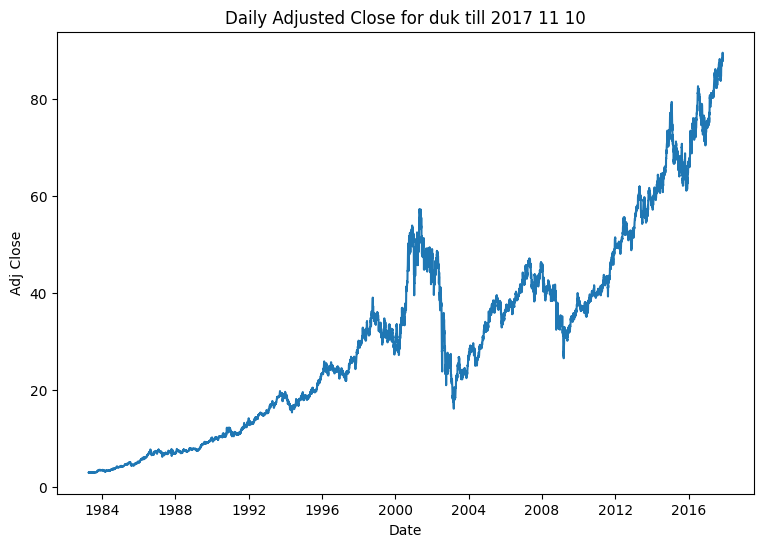

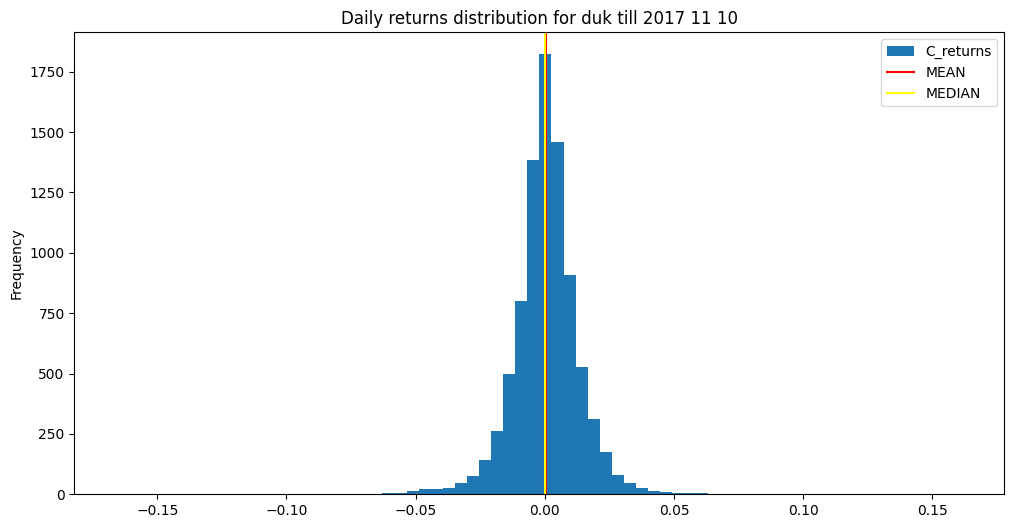

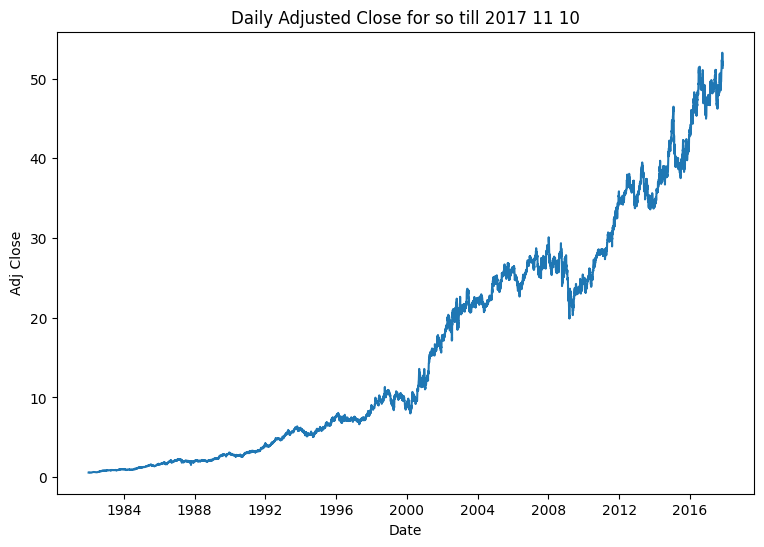

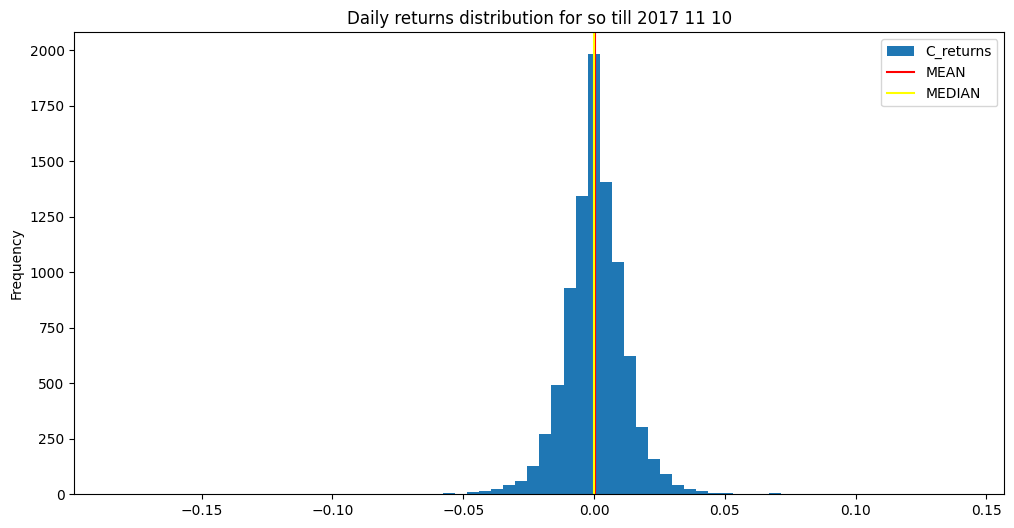

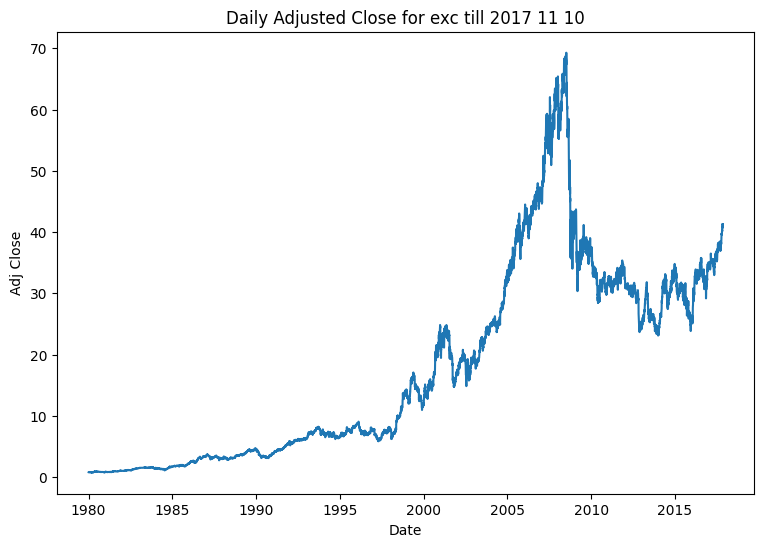

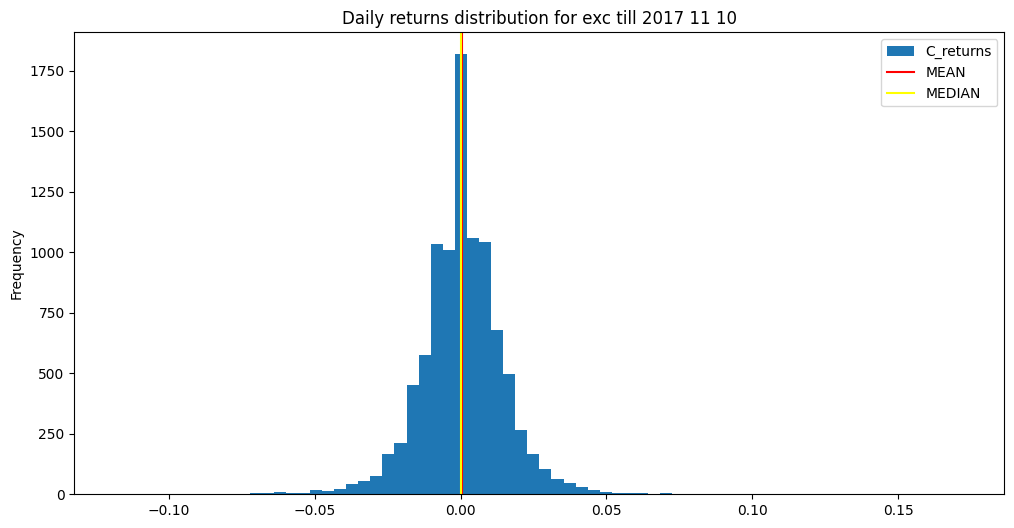

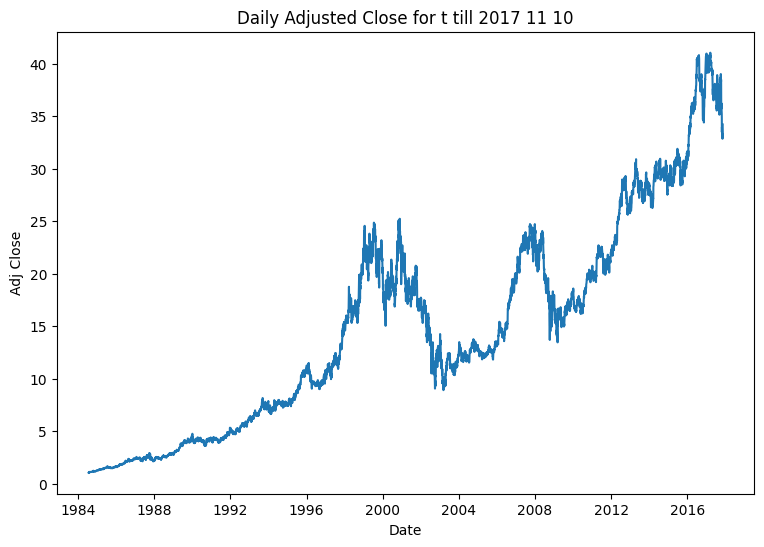

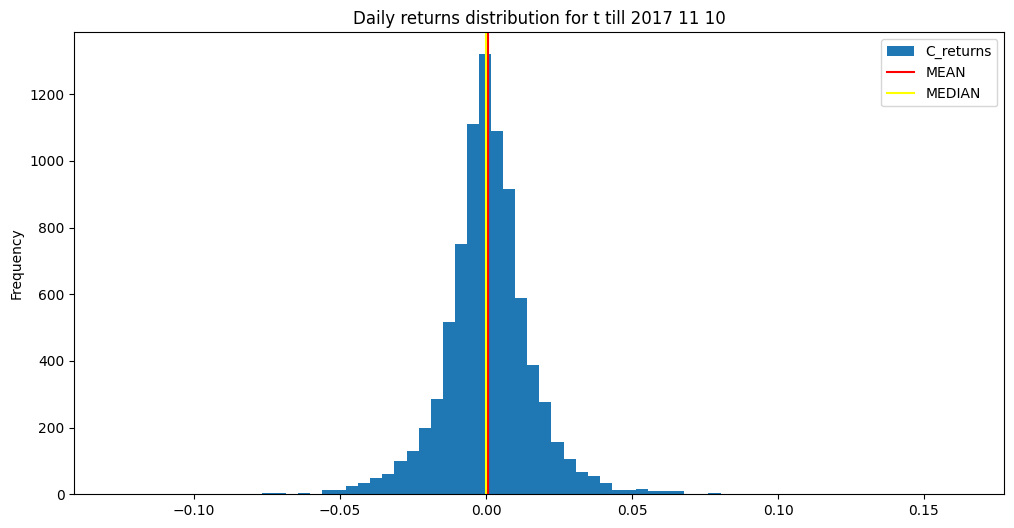

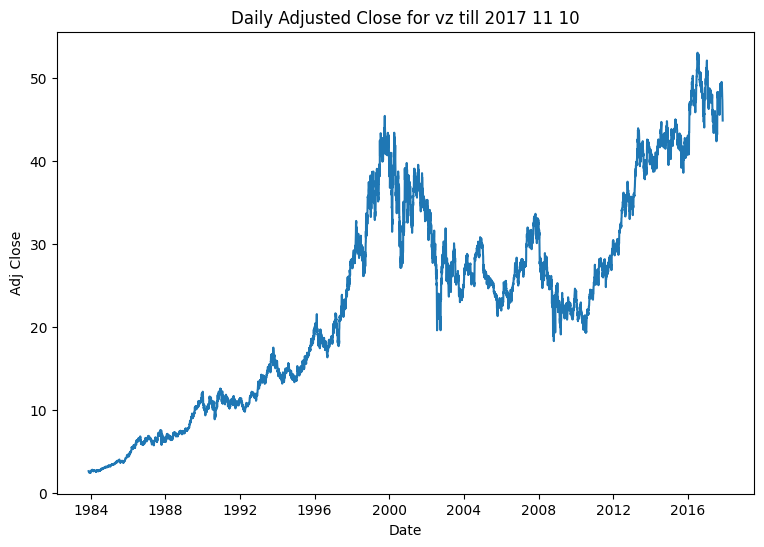

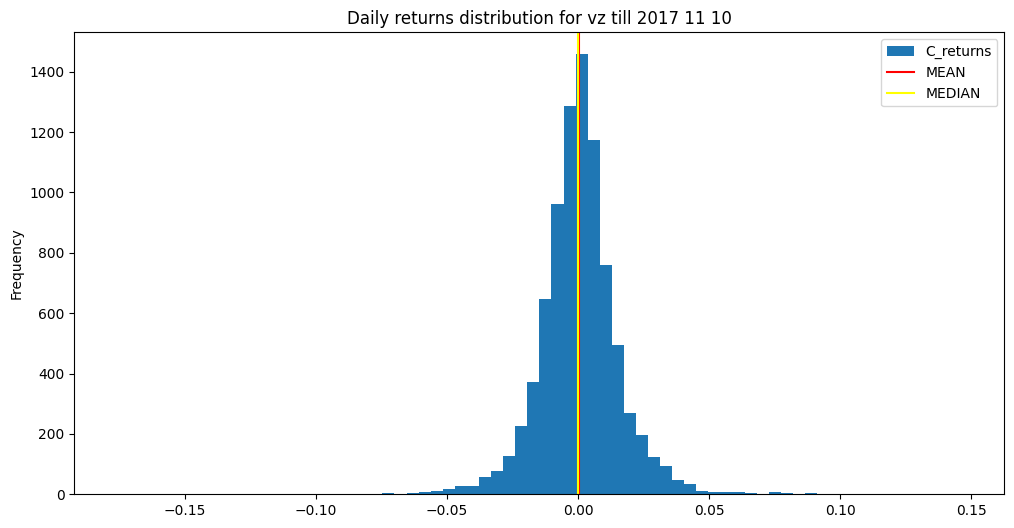

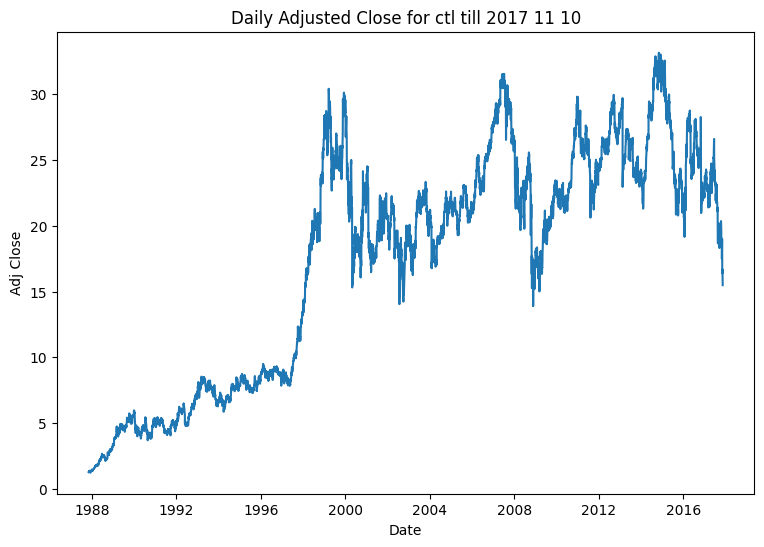

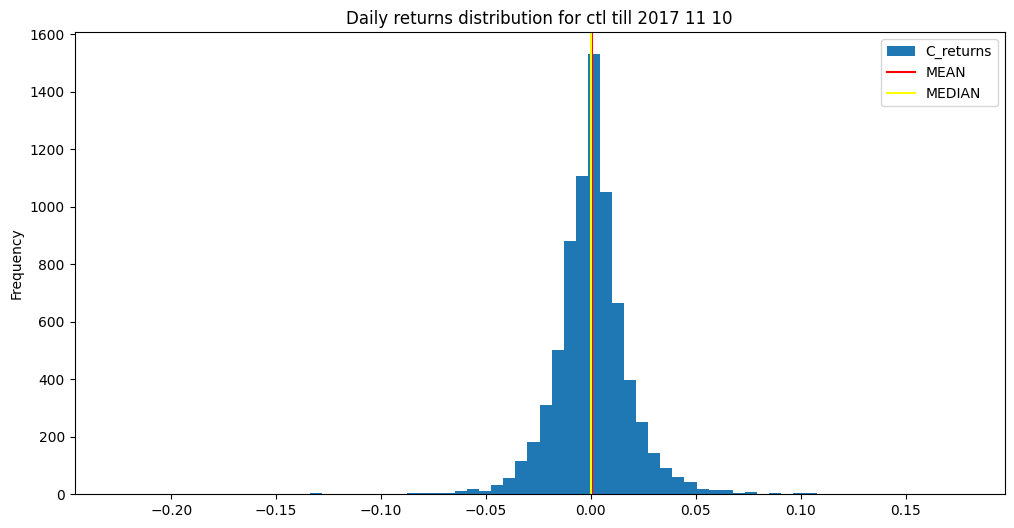

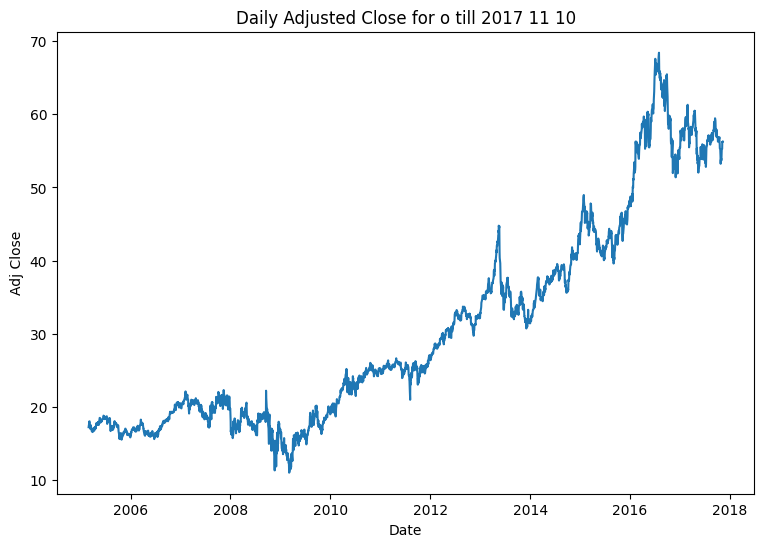

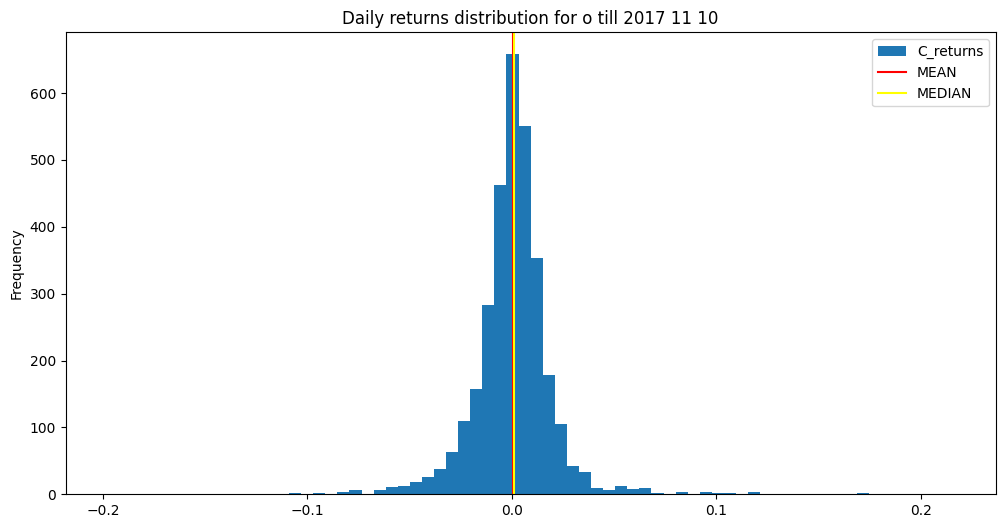

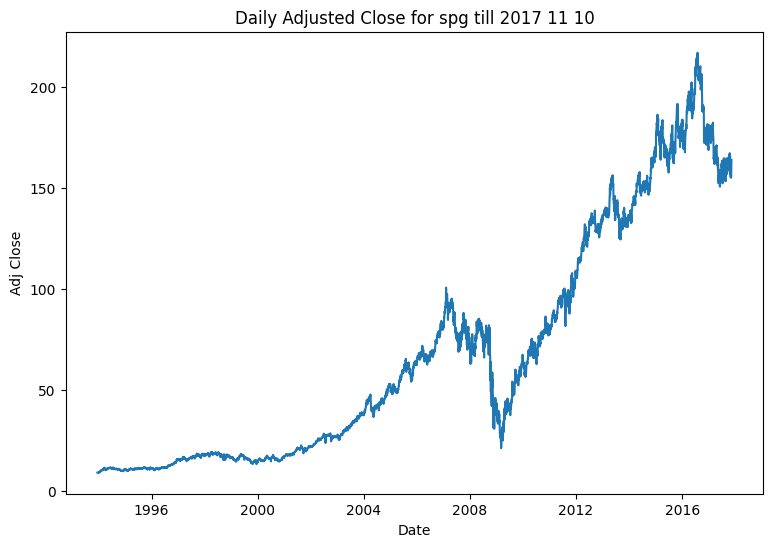

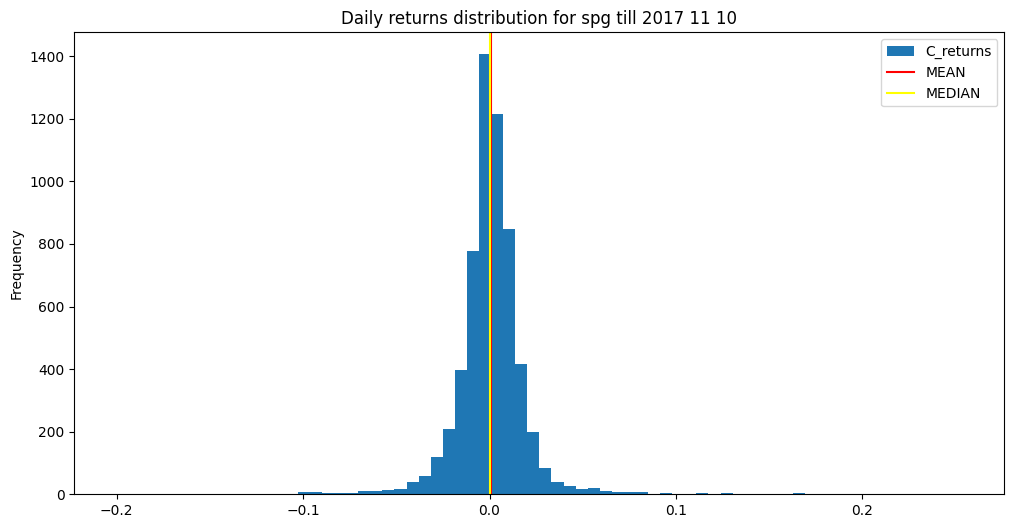

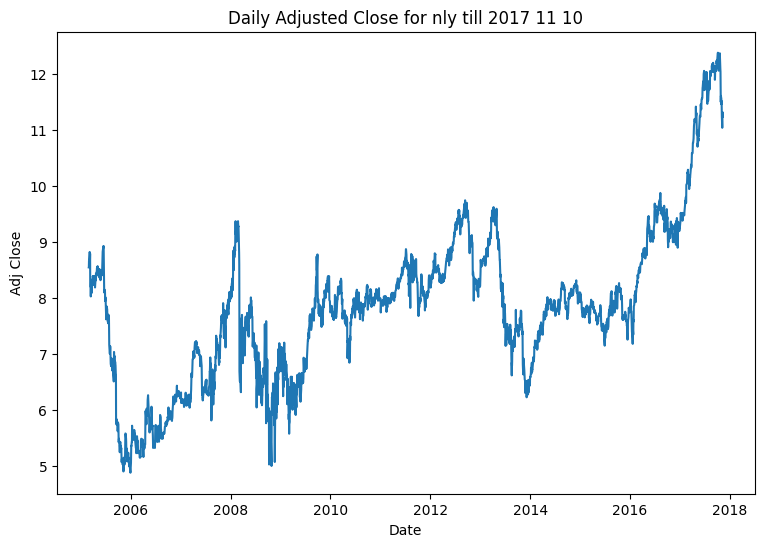

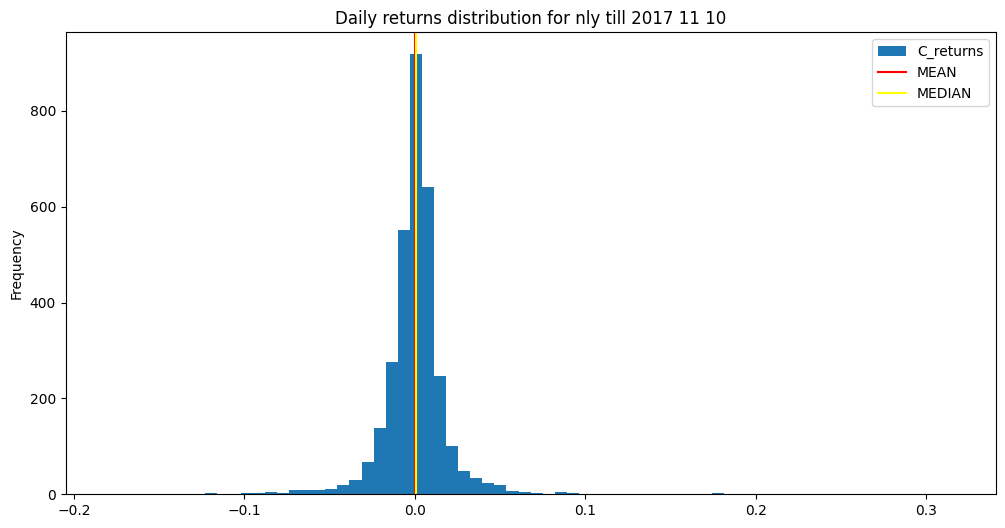

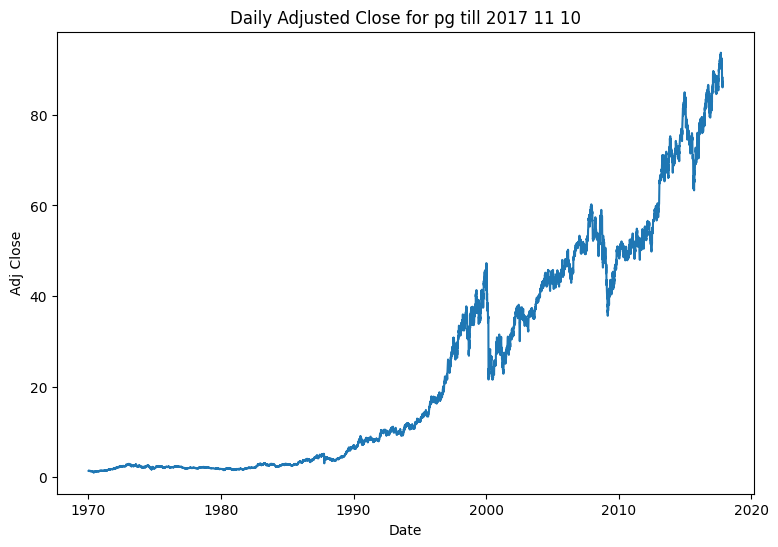

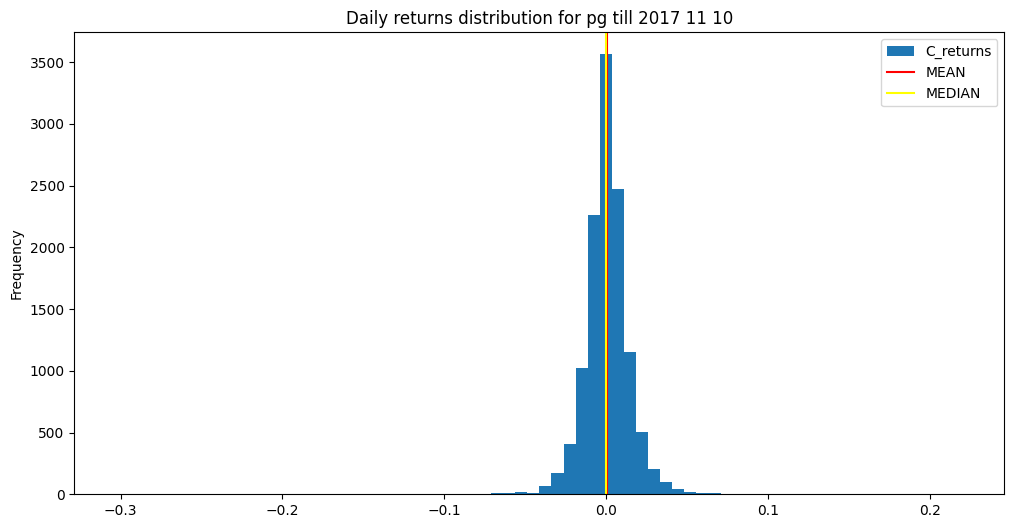

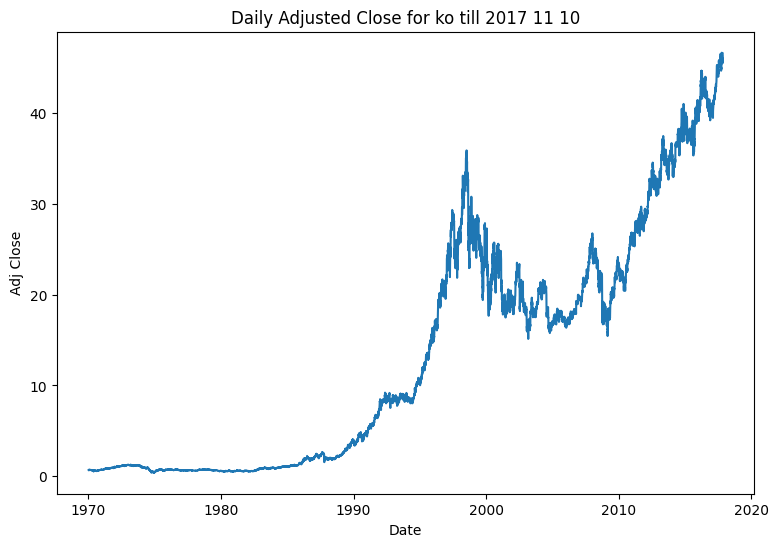

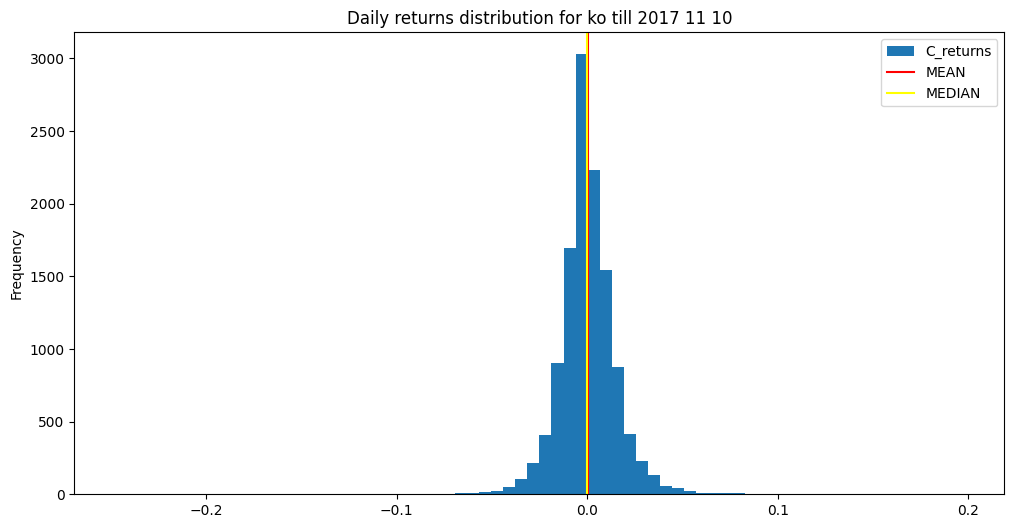

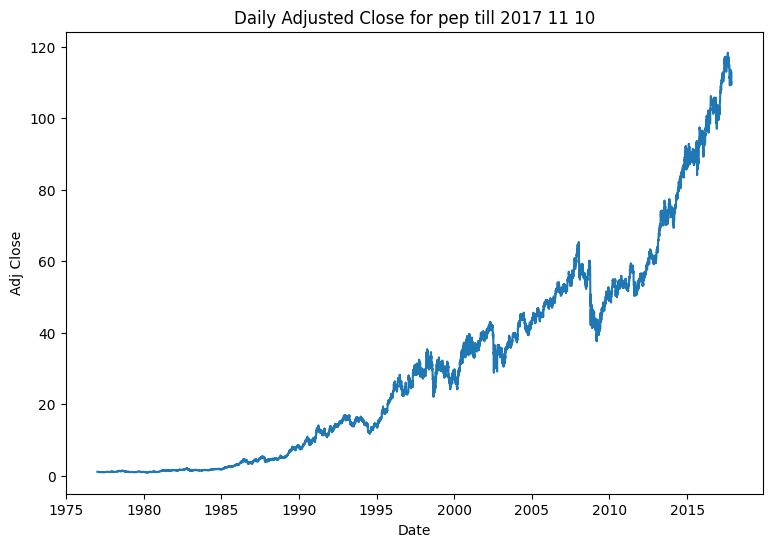

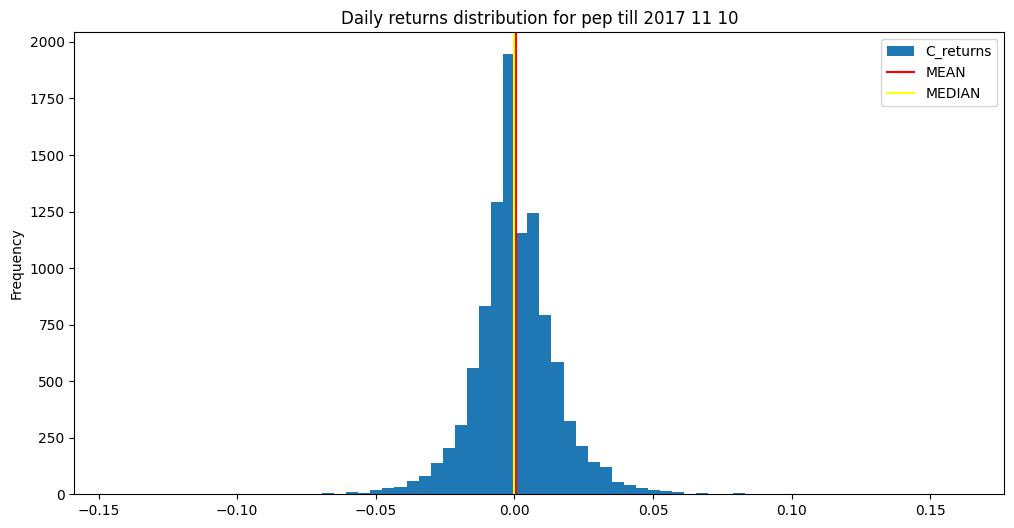

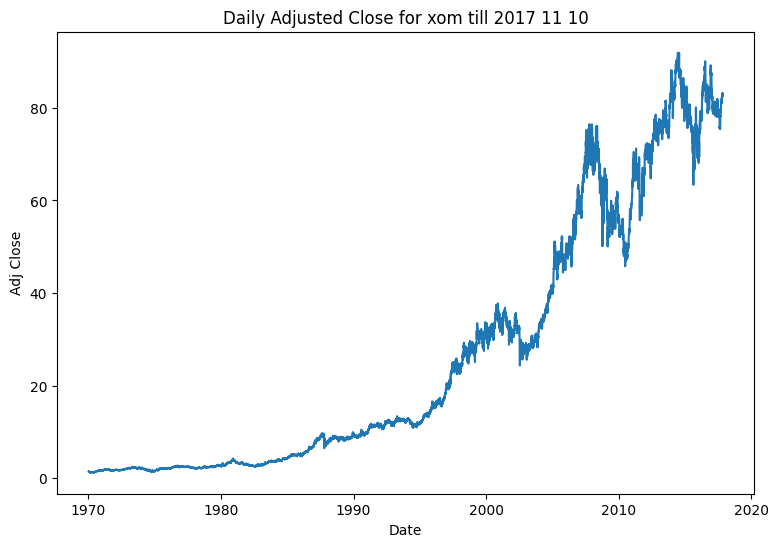

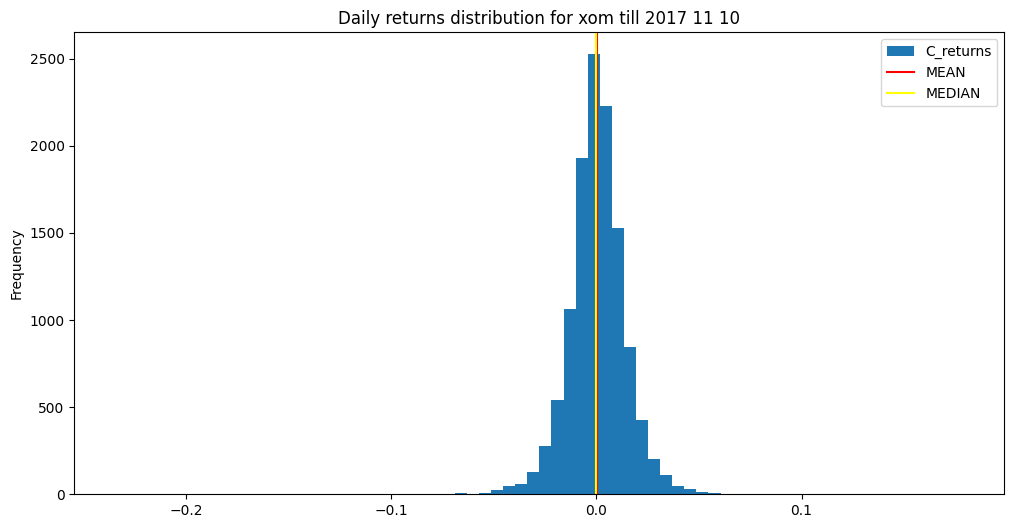

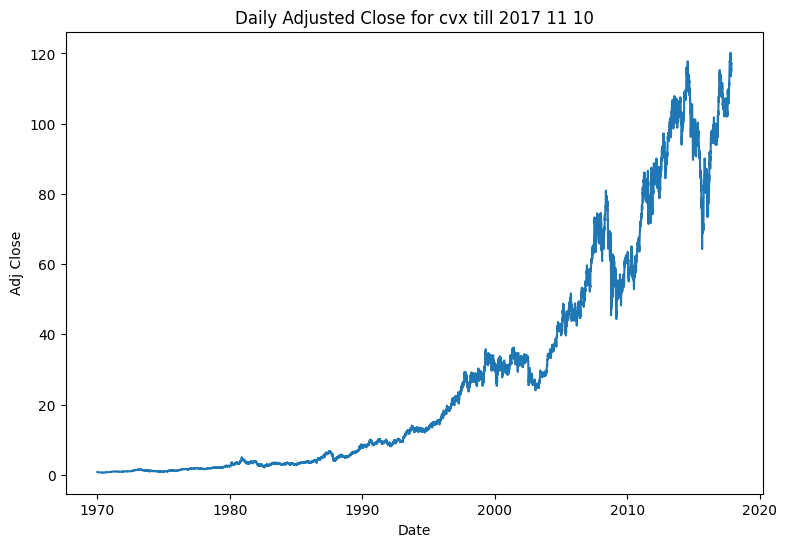

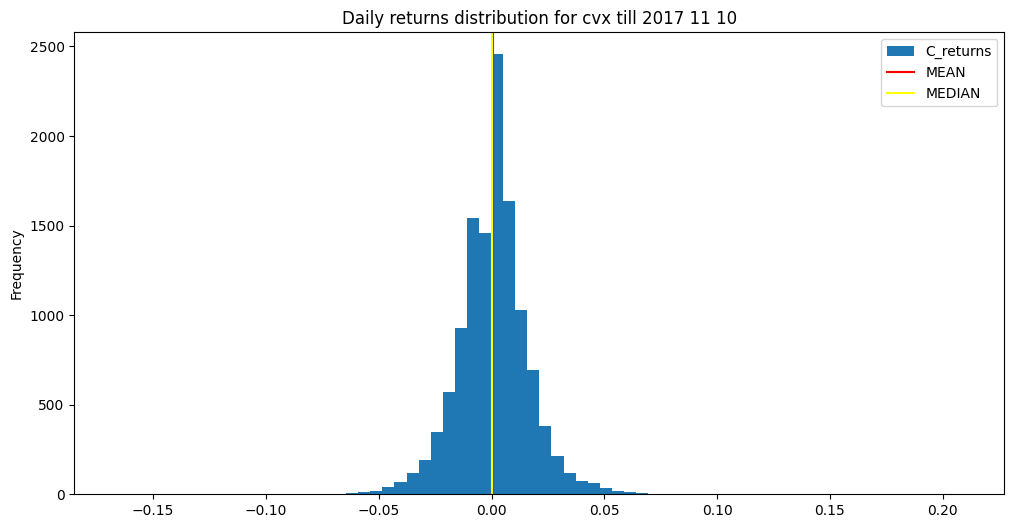

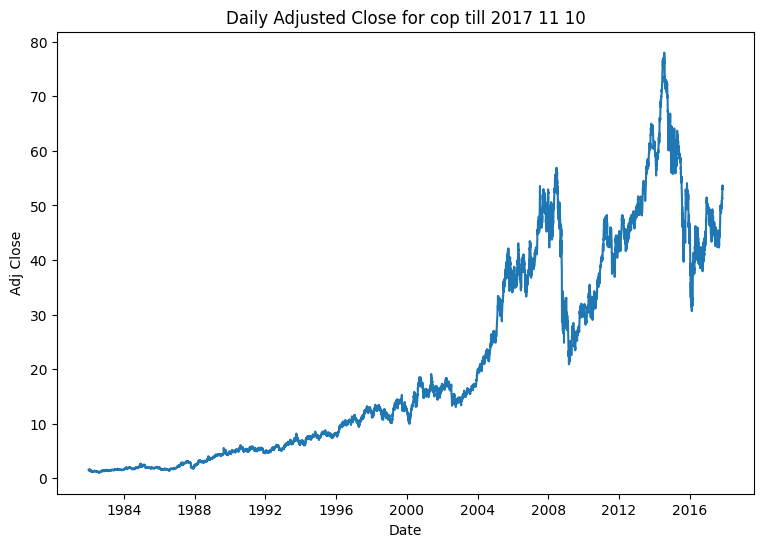

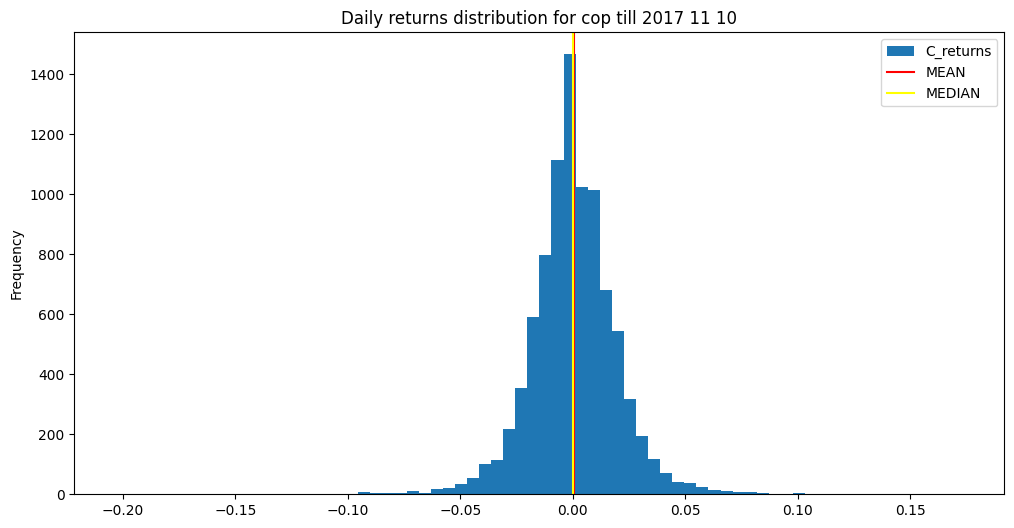

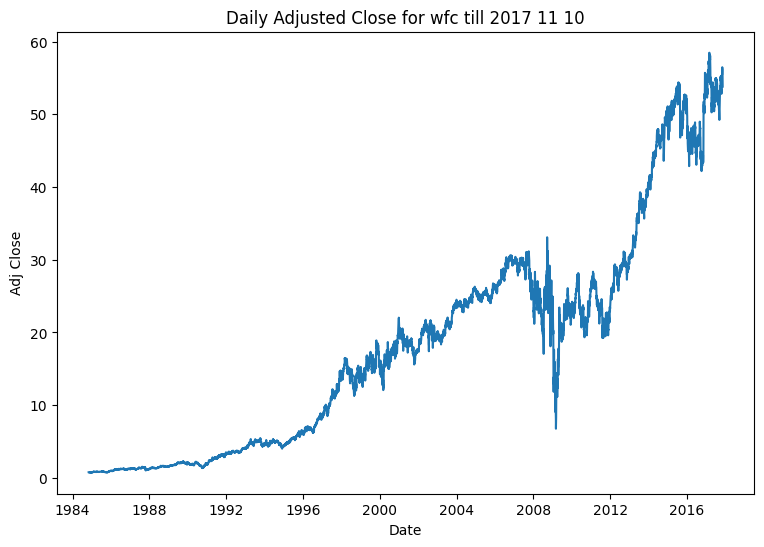

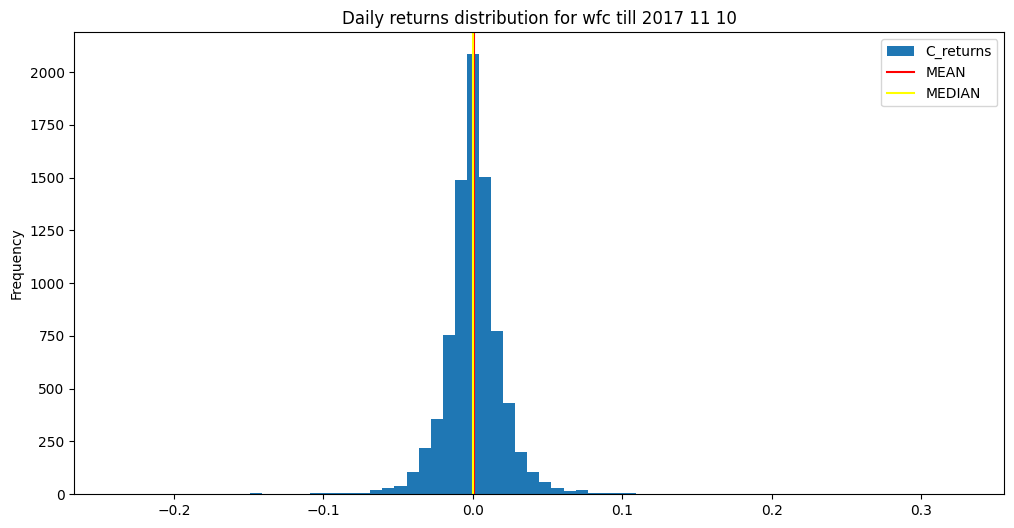

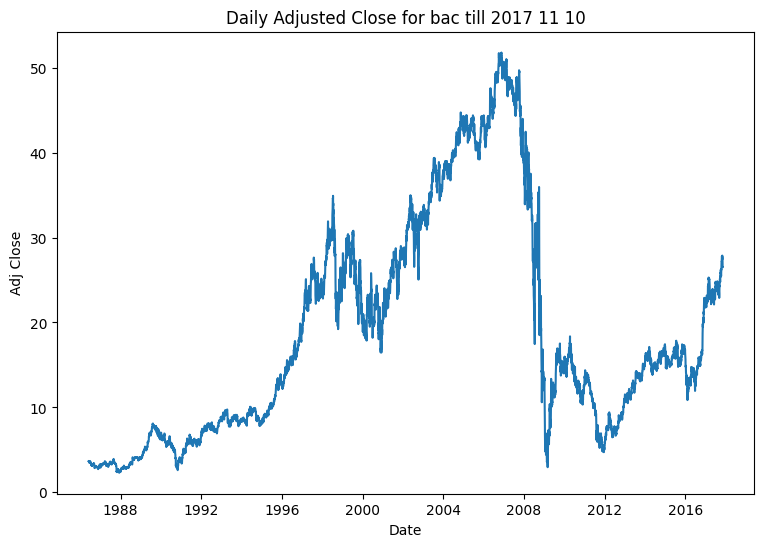

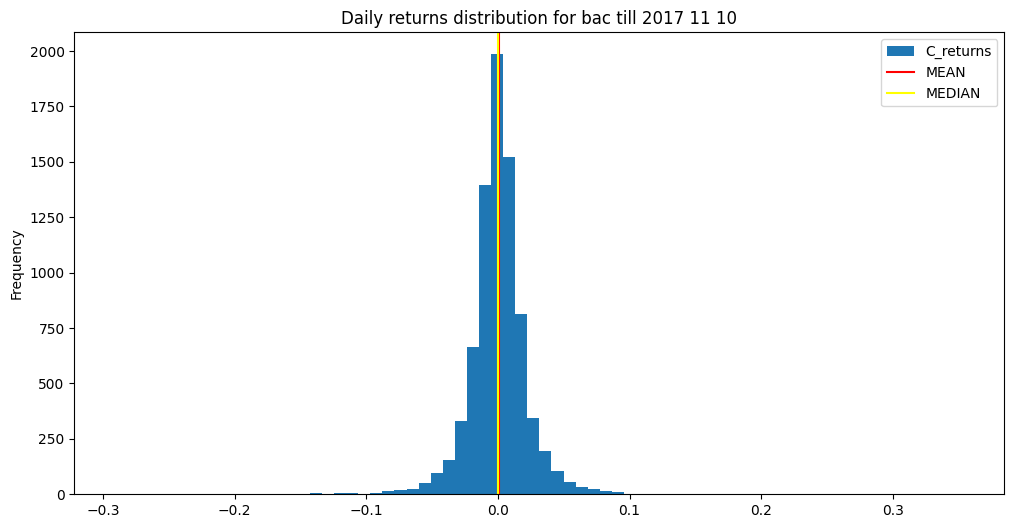

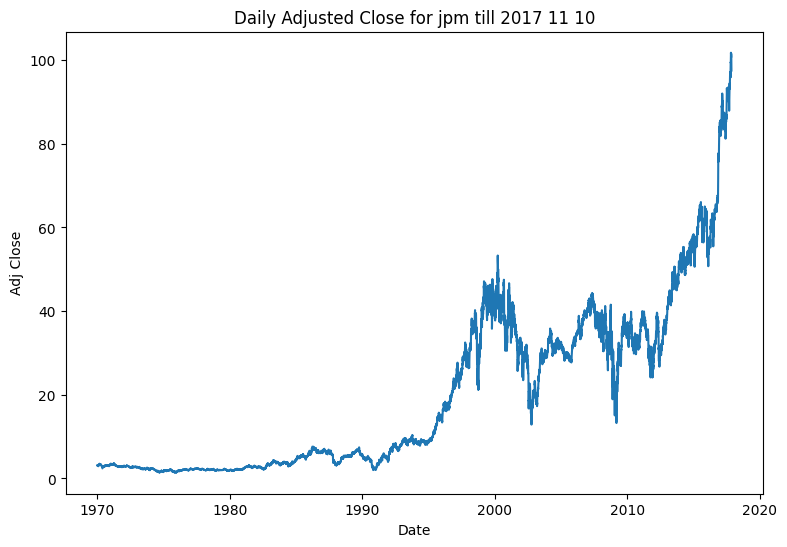

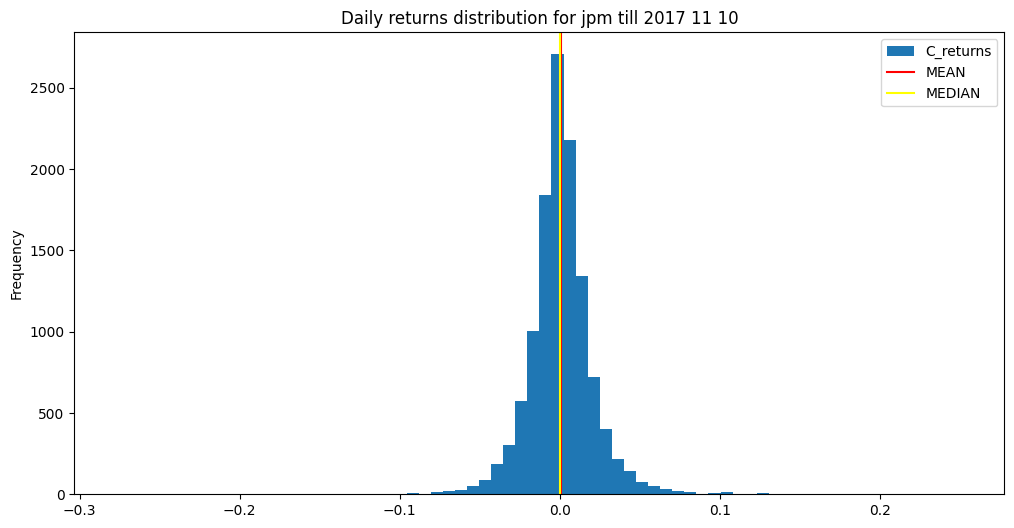

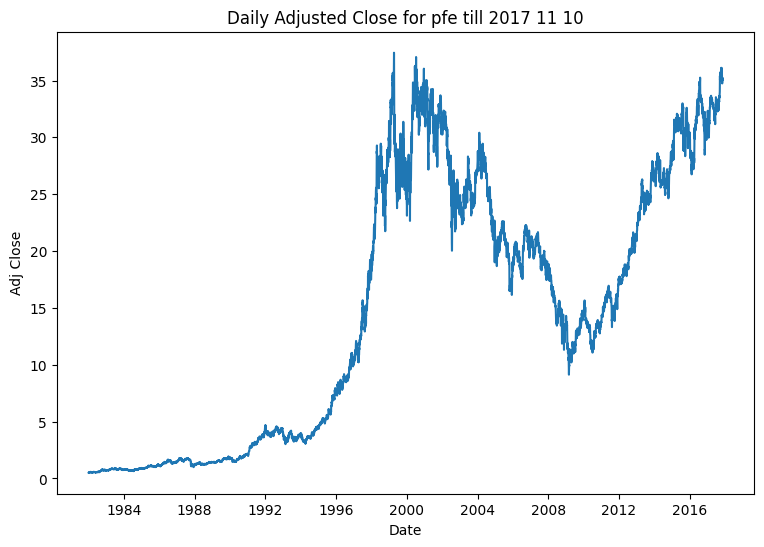

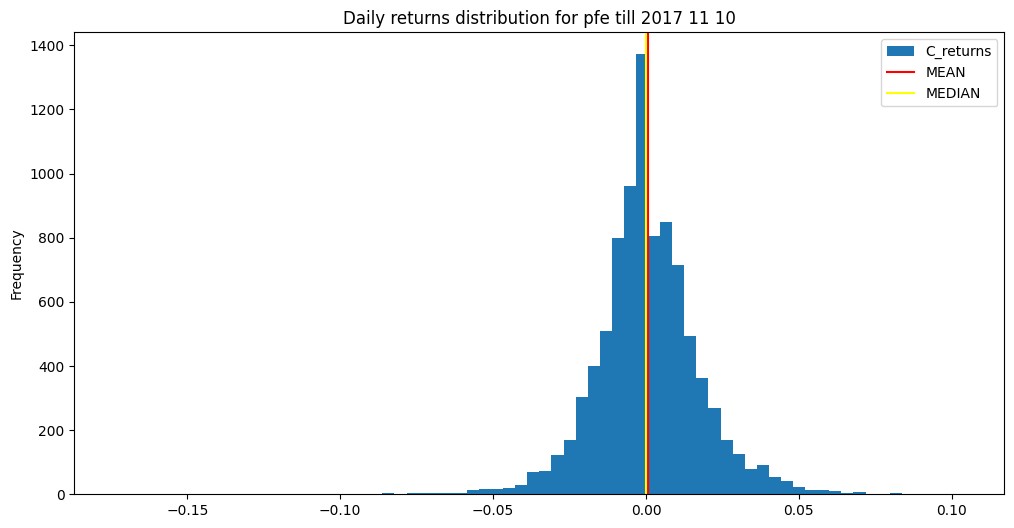

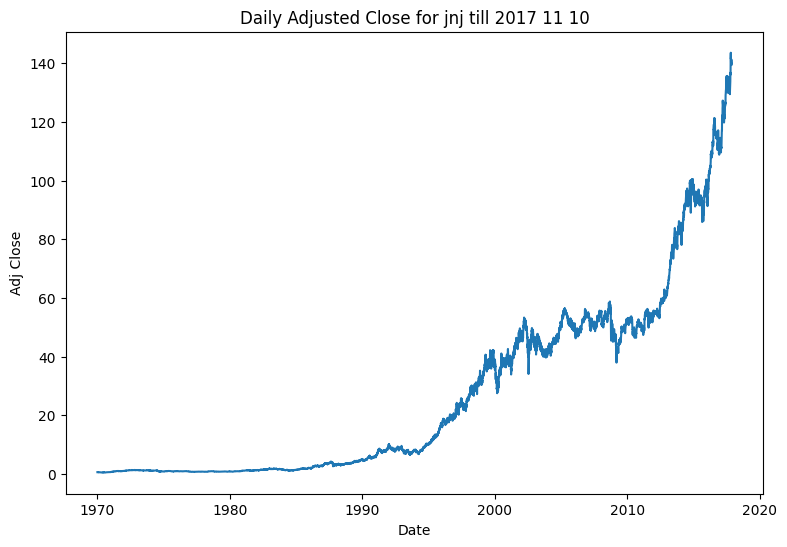

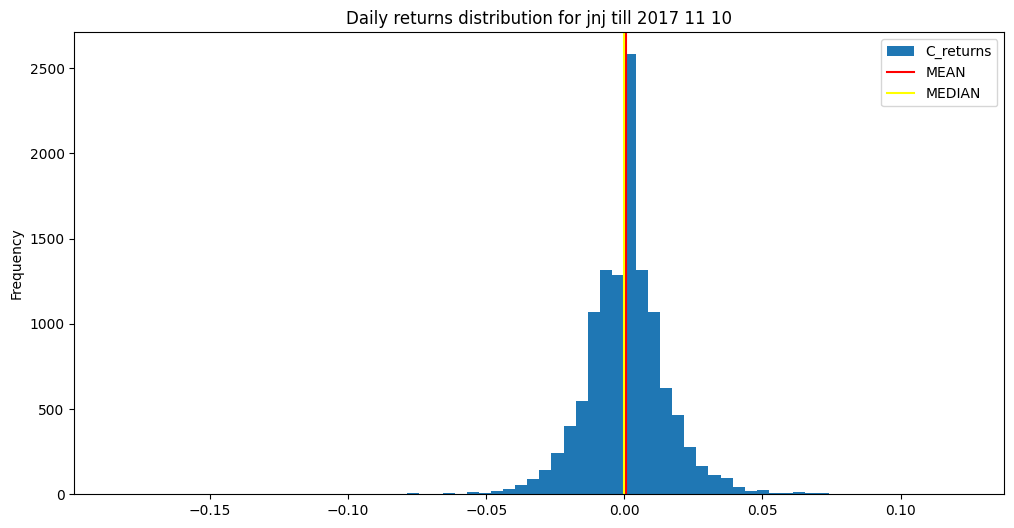

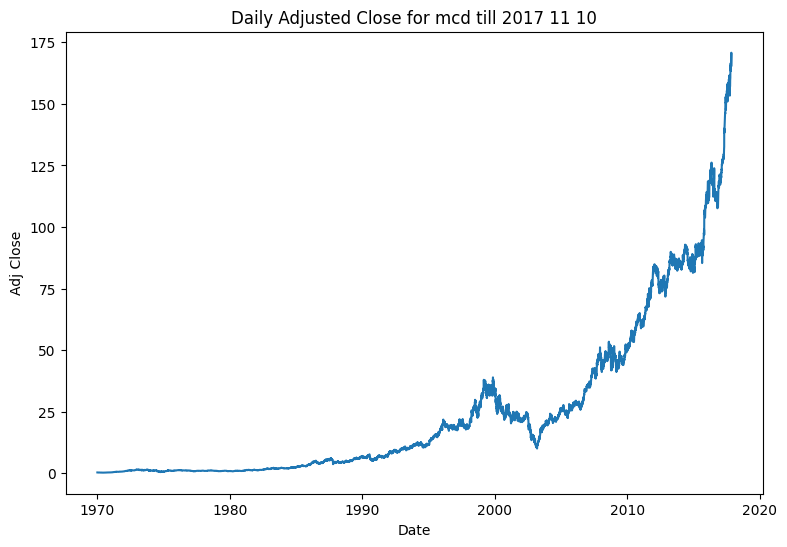

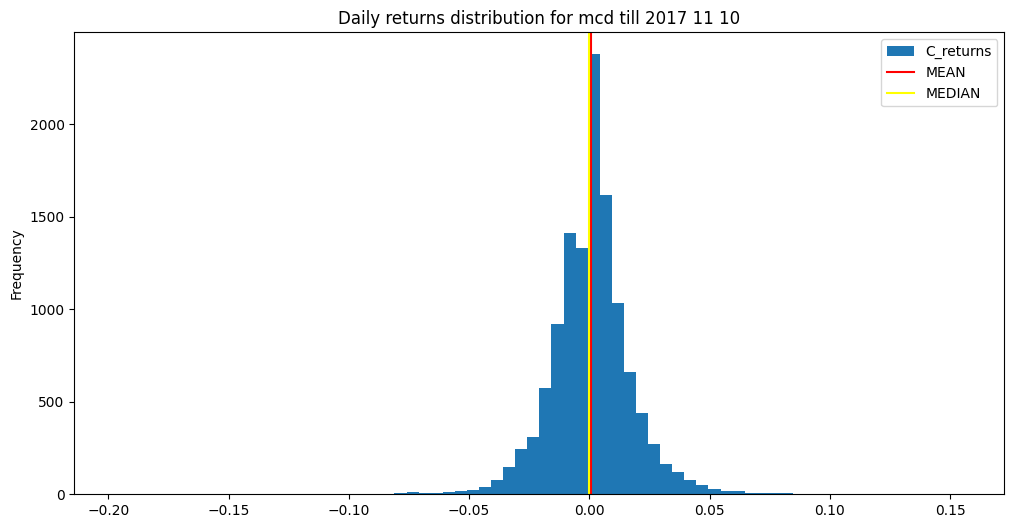

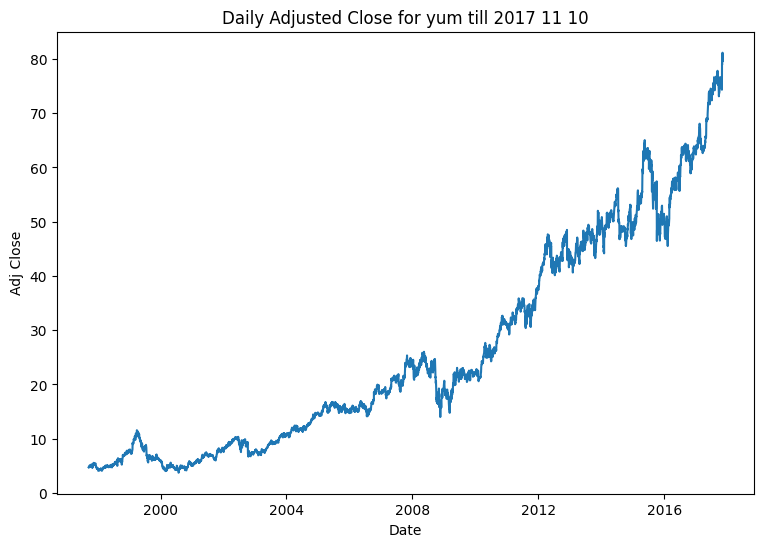

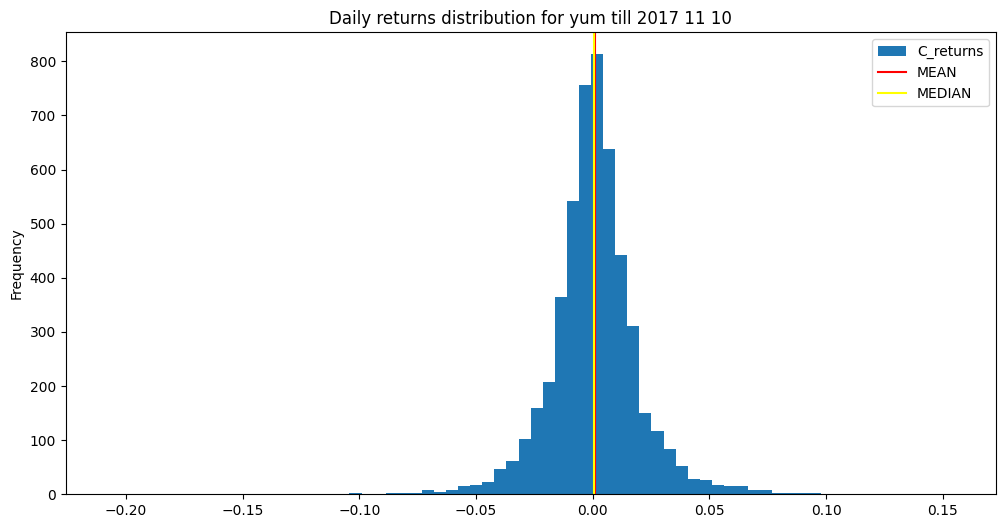

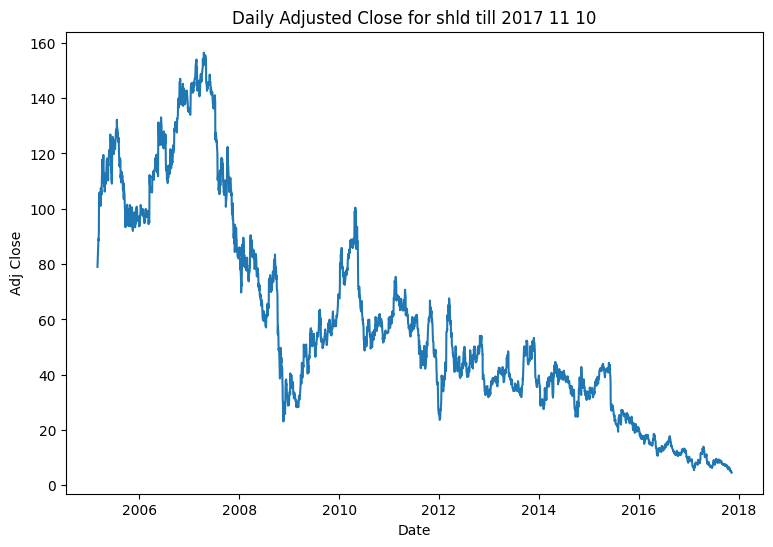

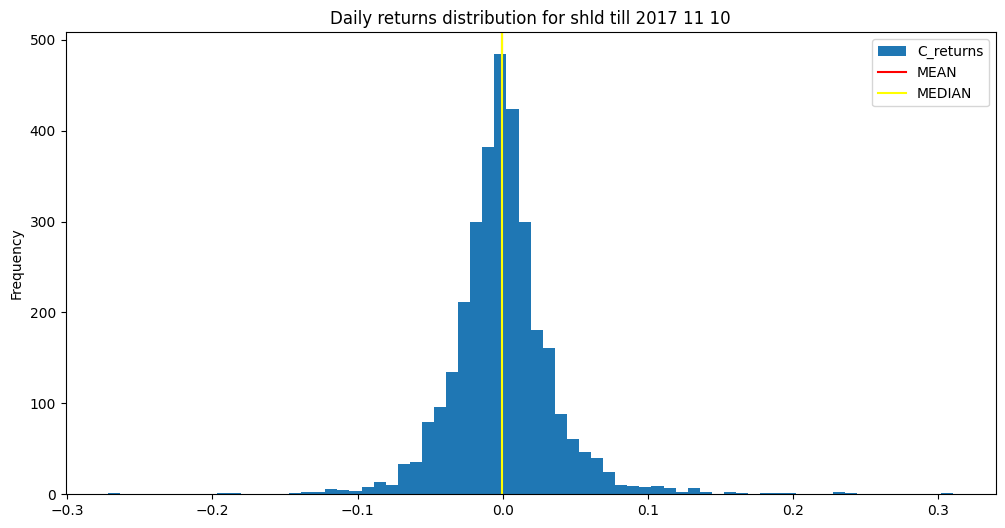

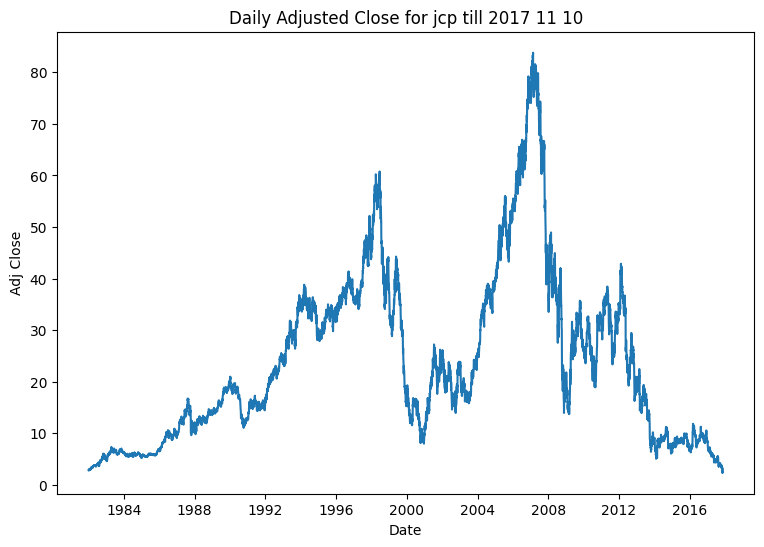

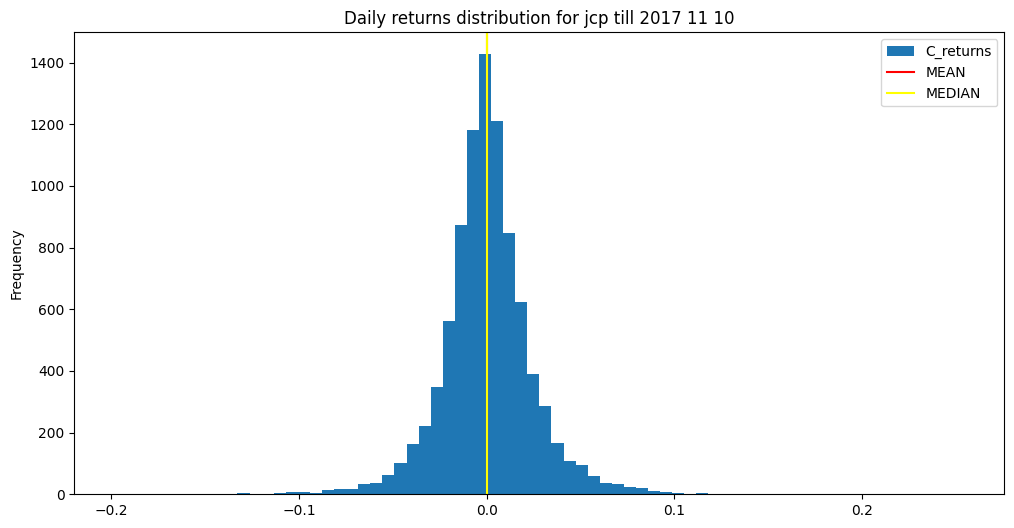

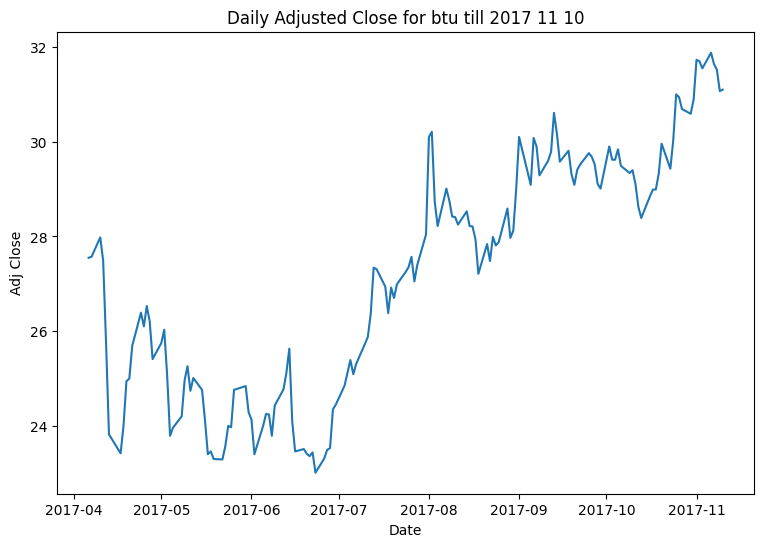

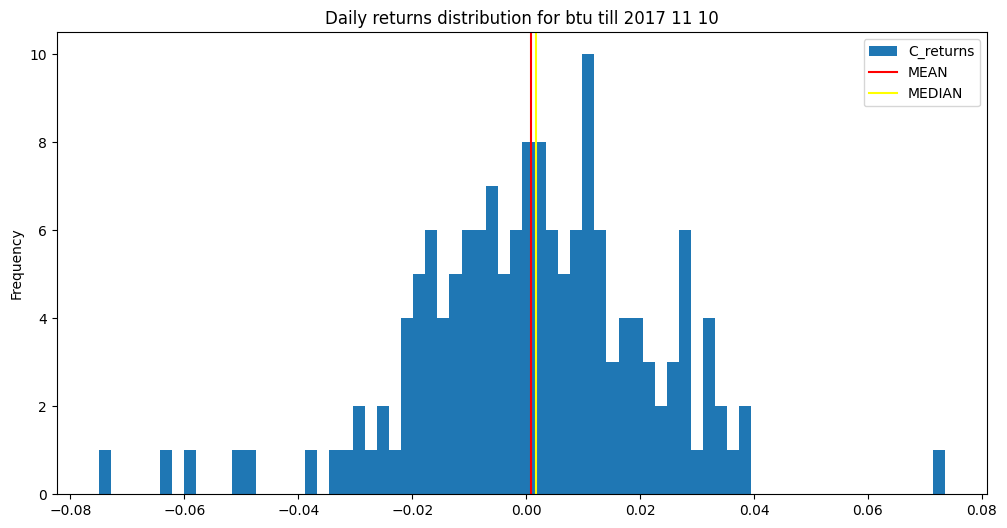

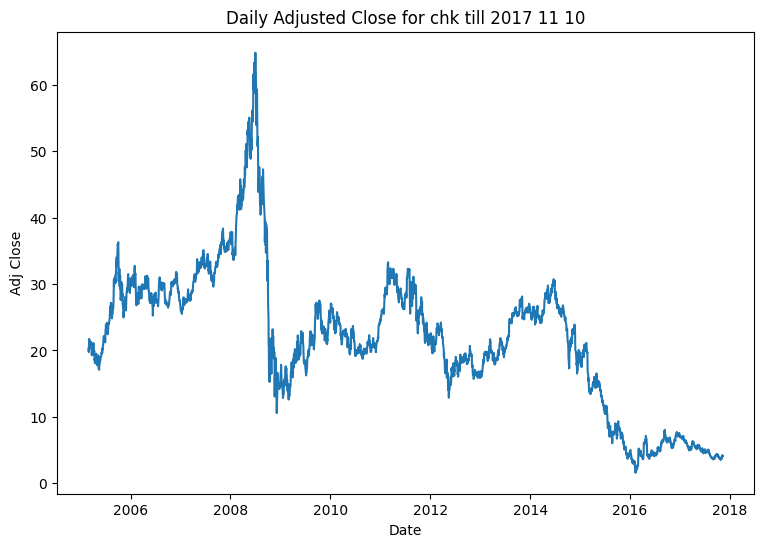

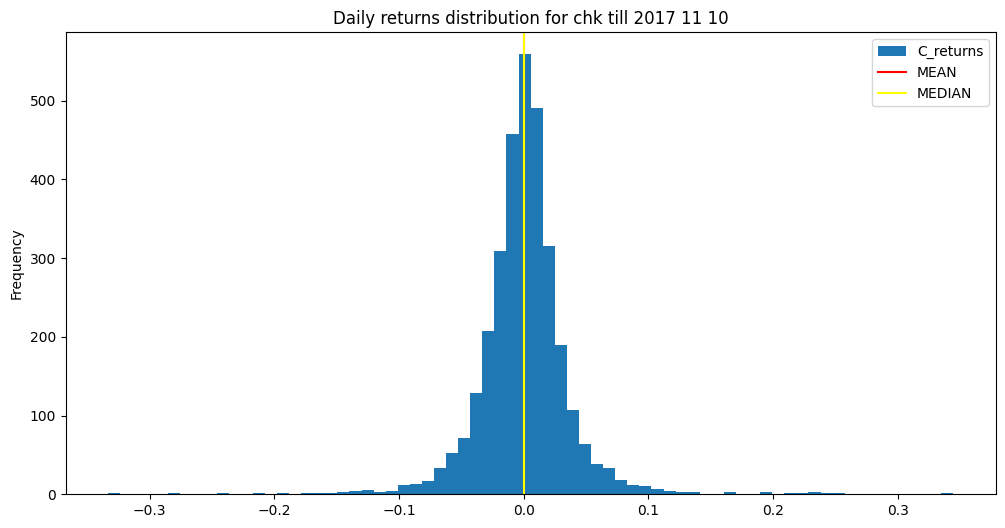

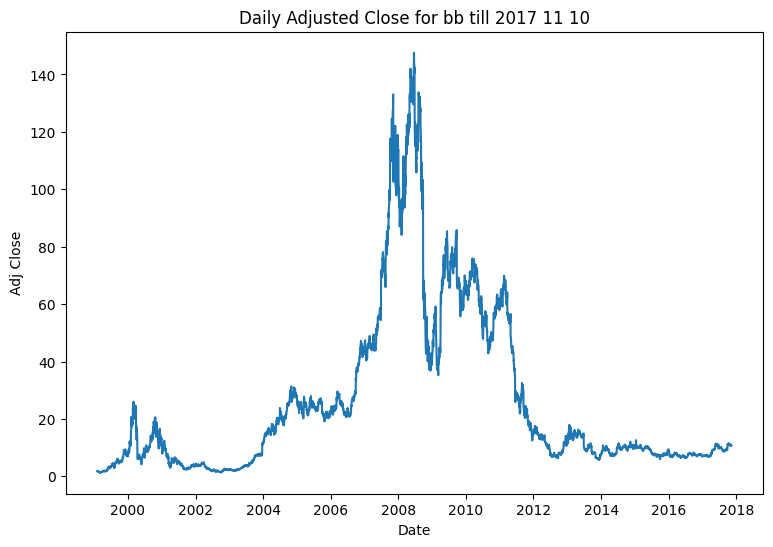

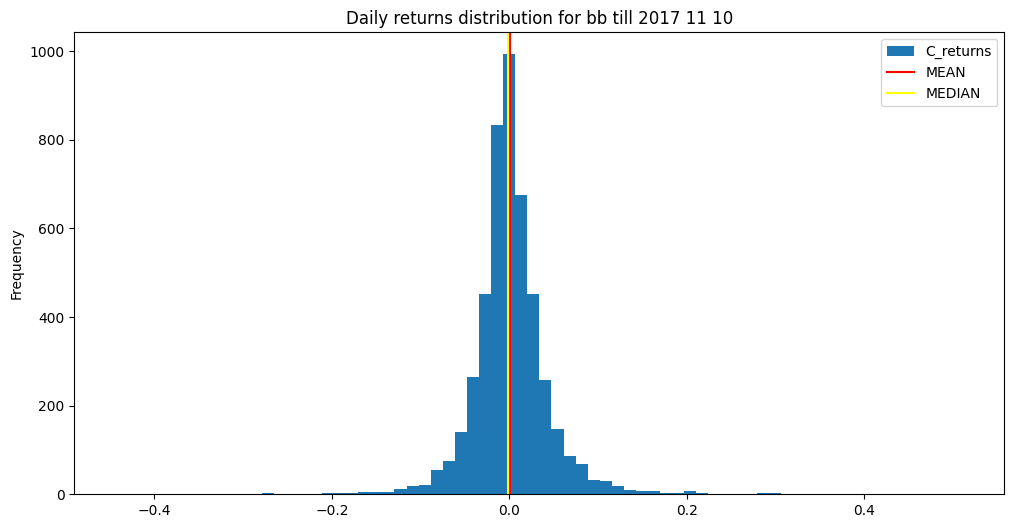

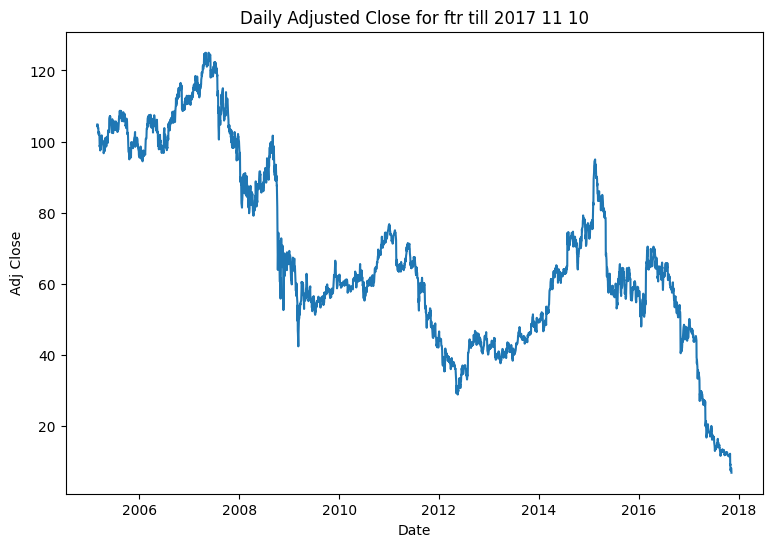

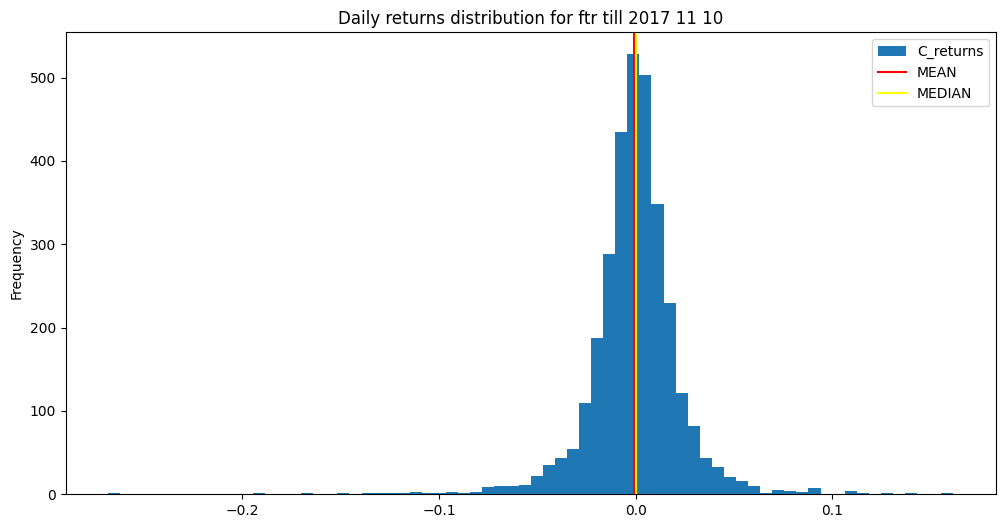

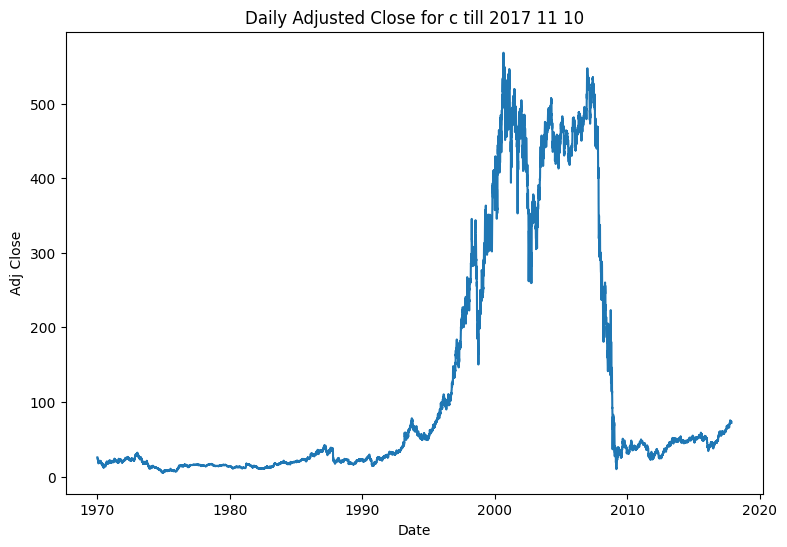

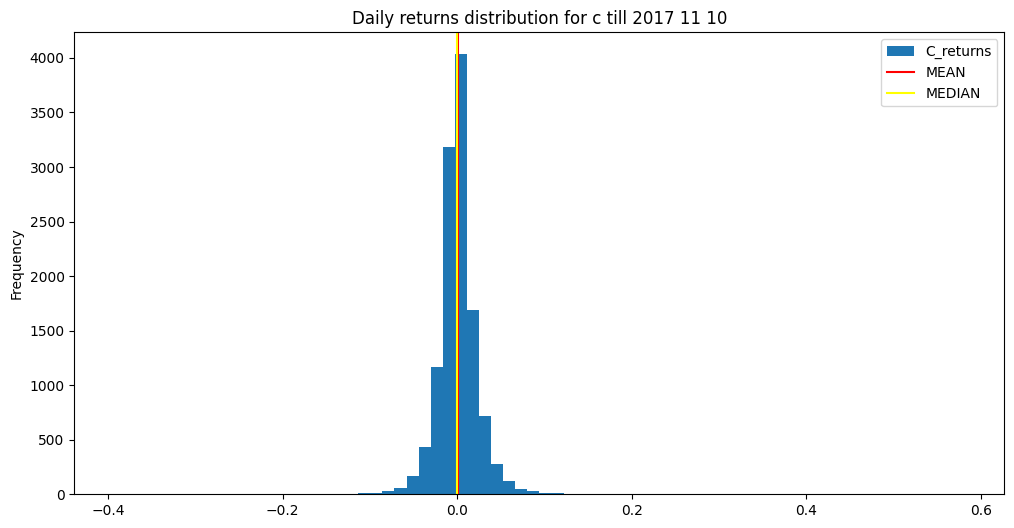

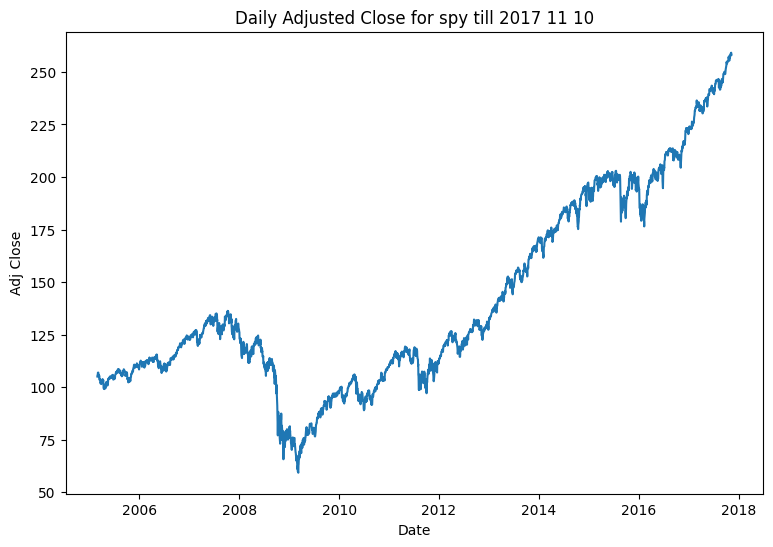

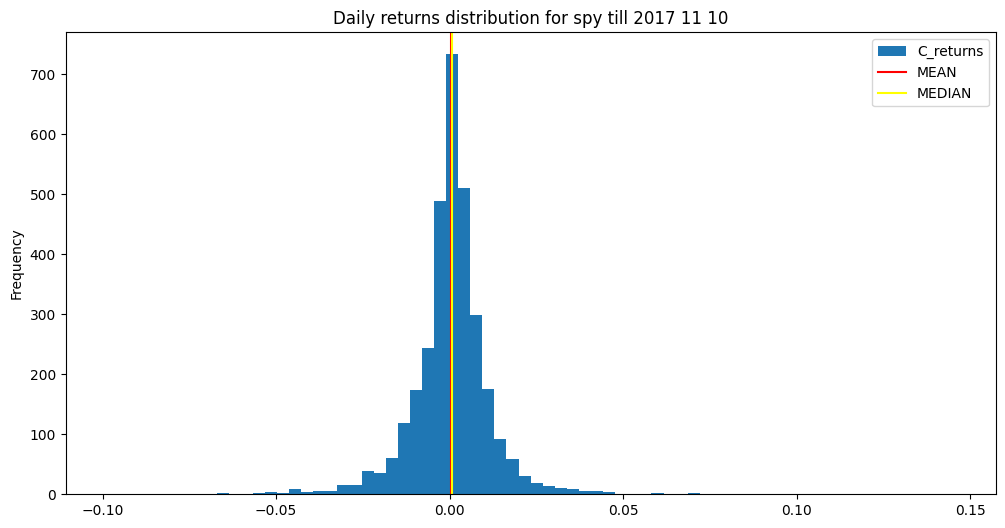

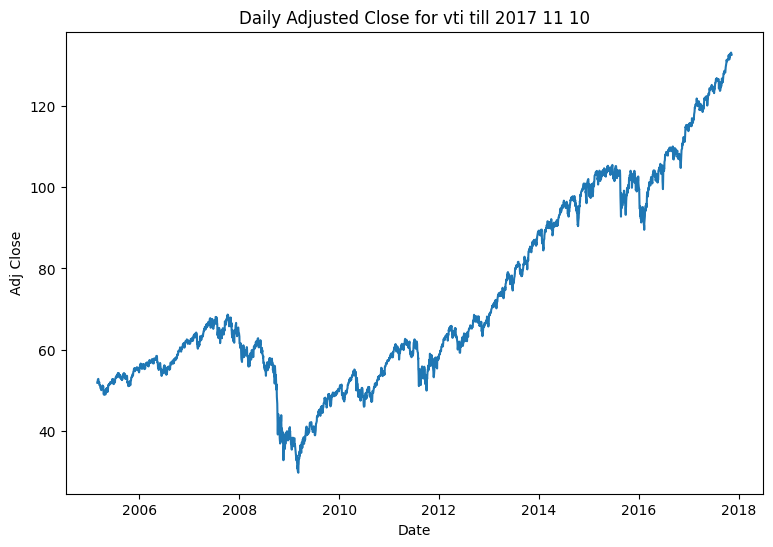

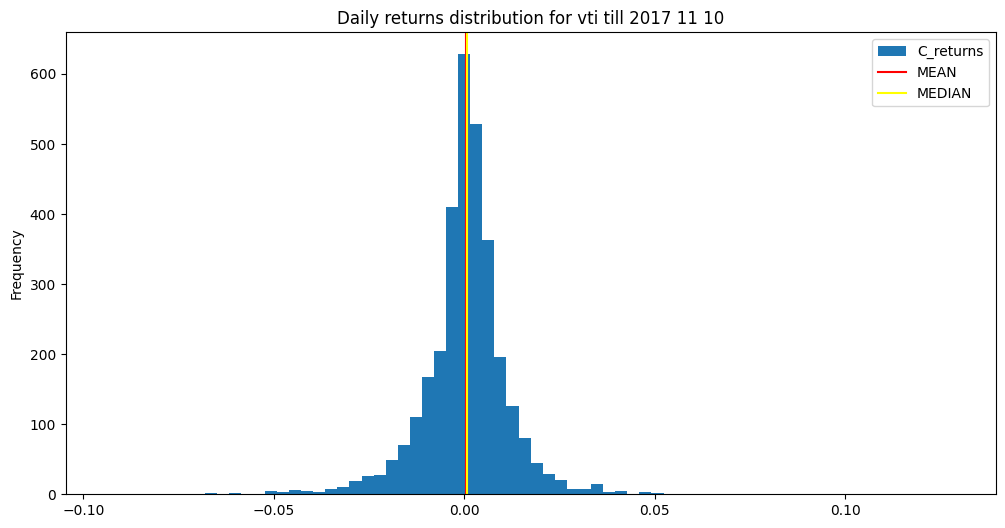

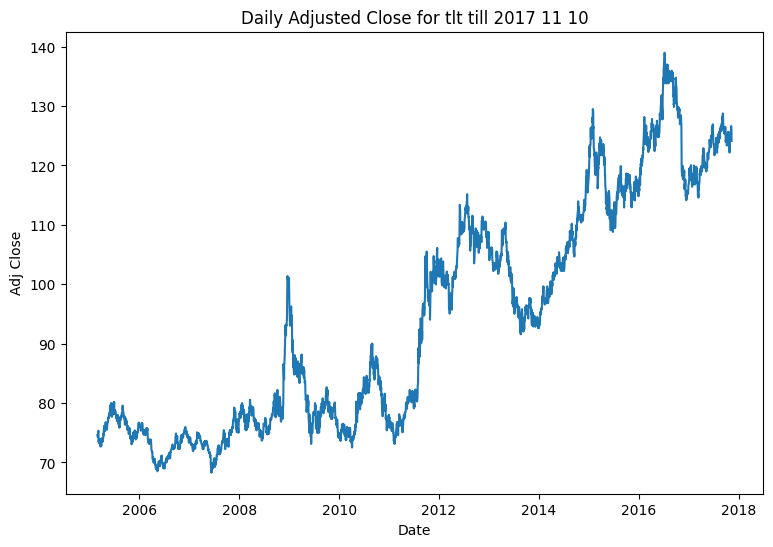

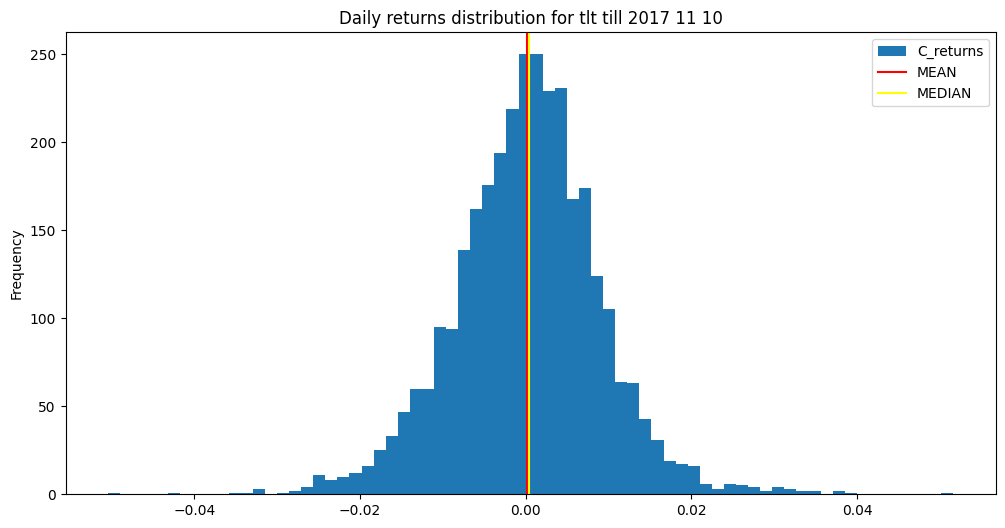

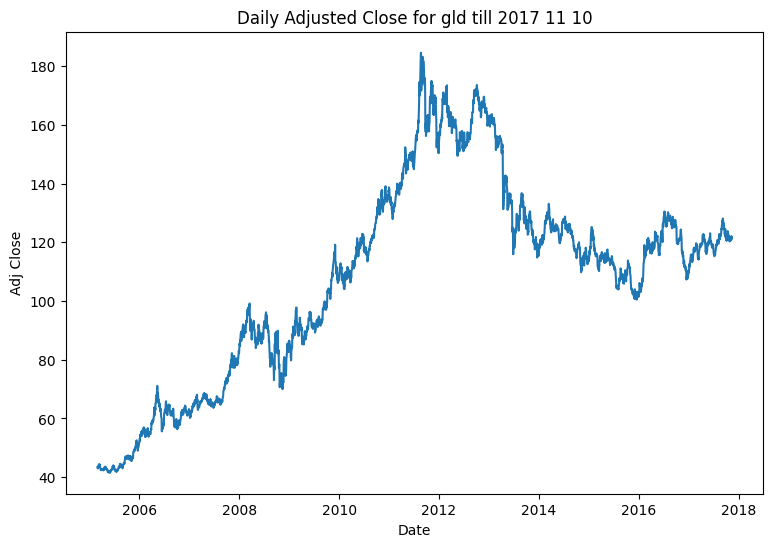

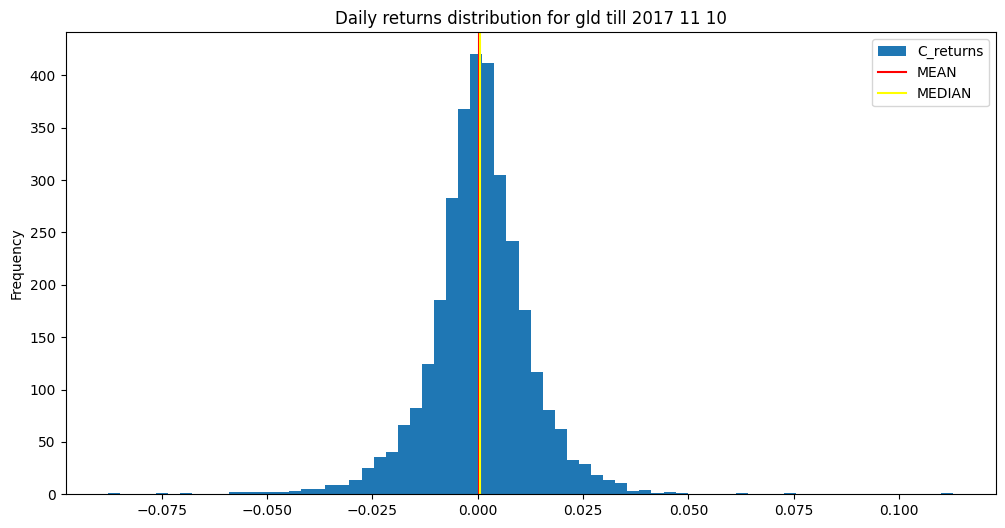

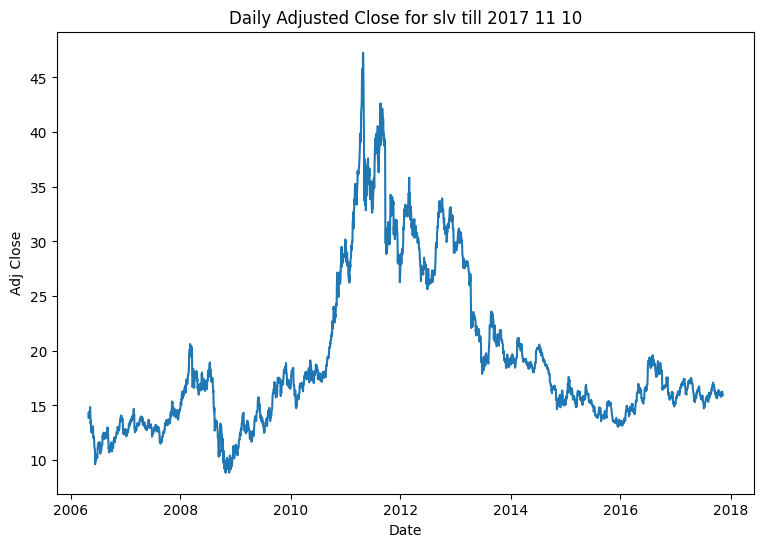

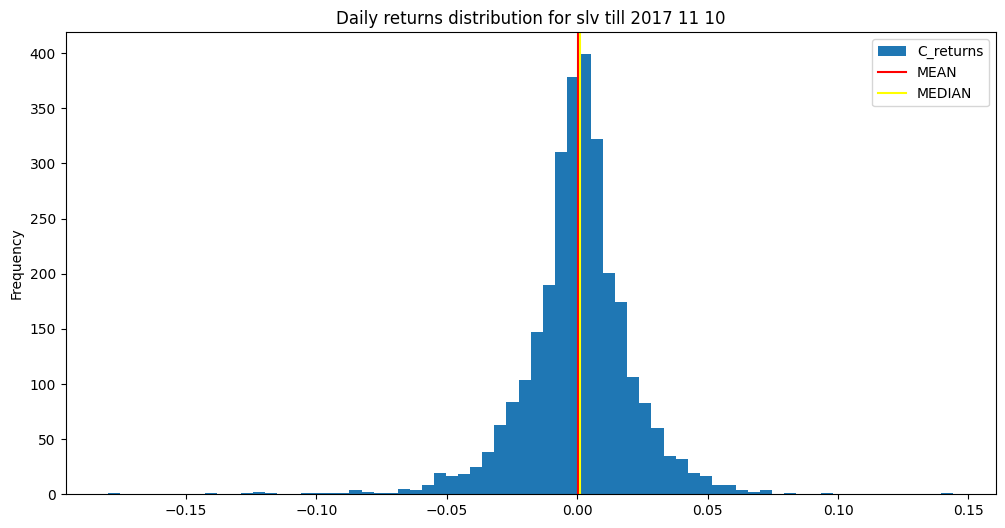

In [184]:
for stock in stock_dfs:
    df = stock_dfs[stock]
    # Stock price chart, based on Adj. Close
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(9, 6)
    plt.plot(df[['Date', 'Close']].set_index('Date'))
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.title(f'Daily Adjusted Close for {stock} till 2017 11 10')
    plt.show()

    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(12, 6)
    df['C_returns'].plot(kind='hist', bins=70)
    plt.axvline(df['C_returns'].mean(),c='red', label = "MEAN")
    plt.axvline(df['C_returns'].median(),c='yellow', label = "MEDIAN")
    plt.title(f'Daily returns distribution for {stock} till 2017 11 10')
    plt.legend()

In [ ]:
for stock in stock_dfs:
    df = stock_dfs[stock]